# Instalar librería


In [1]:
!pip install chars2vec 

     |████████████████████████████████| 8.1MB 1.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/97/b6/65/d7e778ef1213ec77d315aea0f536068b96e36cc94c02abbfde
Successfully built chars2vec


In [2]:
import chars2vec
import sklearn.decomposition
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_20newsgroups


Using TensorFlow backend.


# Char2Vec

1. Cargar el modelo chars2vec
2. Generar una lista de palabras con errores de ortografía 
3. Reducción de dimensionalidad usando PCA de los vectores de la lista de palabras del punto 2
4. Graficar la cercanía entre las palabras según su análisis de caracteres

In [3]:
# Models names: 'eng_50', 'eng_100', 'eng_150' 'eng_200', 'eng_300'
c2v_model = chars2vec.load_model('eng_300')

words = ['Natural', 'Language', 'Understanding',
         'Naturael', 'Longuge', 'Updderctundjing',
         'Motural', 'Lamnguoge', 'Understaating',
         'Naturrow', 'Laguage', 'Unddertandink',
         'Nattural', 'Languagge', 'Umderstoneding']

# Create word embeddings
word_embeddings = c2v_model.vectorize_words(words)

# Project embeddings on plane using the PCA
projection_2d = sklearn.decomposition.PCA(n_components=2).fit_transform(word_embeddings)

W0712 02:50:59.769373 139683873011584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 02:50:59.830381 139683873011584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 02:50:59.838852 139683873011584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0712 02:51:01.218704 139683873011584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 02:51:01.268248 139683873011584 deprecation_wrappe

# Graficar


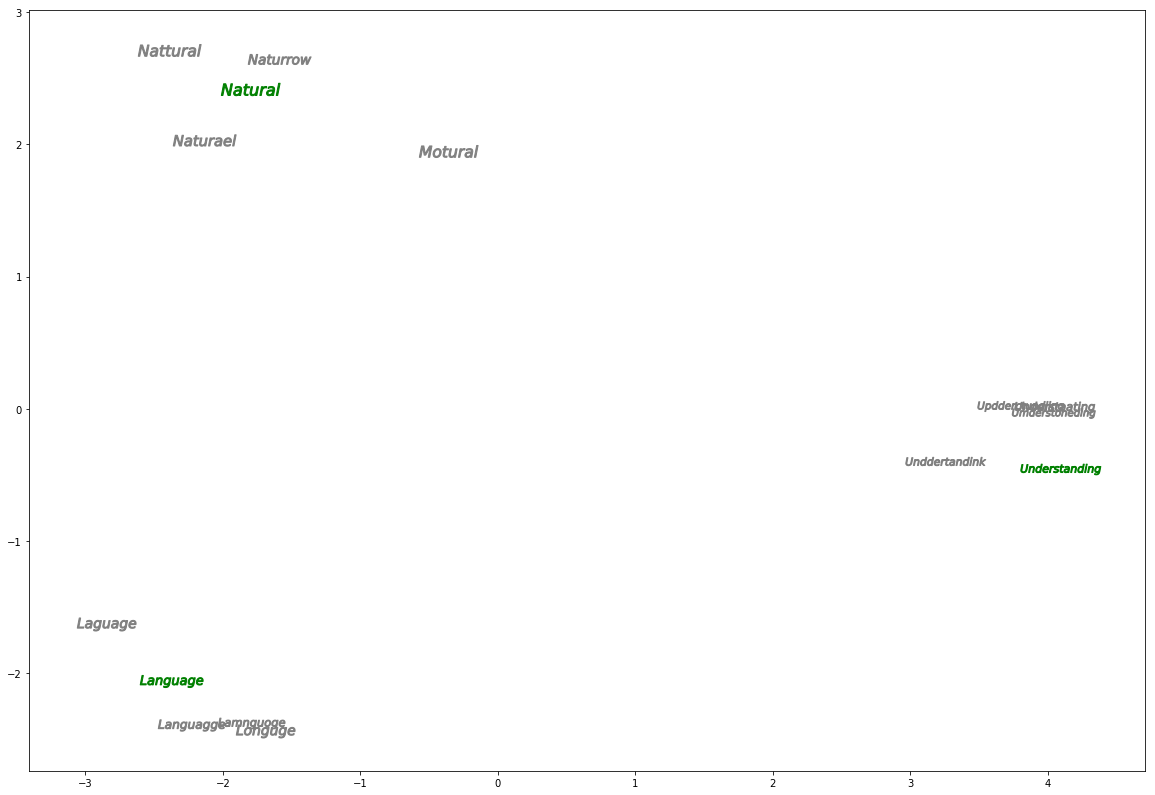

In [4]:
# Draw words on plane
f = plt.figure(figsize=(20, 14))

for j in range(len(projection_2d)):
    plt.scatter(projection_2d[j, 0], projection_2d[j, 1],
                marker=('$' + words[j] + '$'),
                s=500 * len(words[j]), label=j,
                facecolors='green' if words[j] 
                           in ['Natural', 'Language', 'Understanding'] else 'gray')

plt.show()

# Entrenar un modelo

* X_train: Contiene una tupla de palabras
* y_train: Tag para cada tupla, palabras similares 0, palabras diferentes 1
* model_chars: Lista de caracteres para el vocabulario

In [0]:
import chars2vec

dim = 50

path_to_model = './model'

X_train = [('mecbanizing', 'mechanizing'), # similar words, target is equal 0
           ('dicovery', 'dis7overy'), # similar words, target is equal 0
           ('prot$oplasmatic', 'prtoplasmatic'), # similar words, target is equal 0
           ('copulateng', 'lzateful'), # not similar words, target is equal 1
           ('estry', 'evadin6'), # not similar words, target is equal 1
           ('cirrfosis', 'afear') # not similar words, target is equal 1
          ]

y_train = [0, 0, 0, 1, 1, 1]

model_chars = ['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.',
               '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<',
               '=', '>', '?', '@', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i',
               'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w',
               'x', 'y', 'z']

In [6]:
# Create and train chars2vec model using given training data
my_c2v_model = chars2vec.train_model(dim, X_train, y_train, model_chars)

# Save pretrained model
chars2vec.save_model(my_c2v_model, path_to_model)

W0712 02:51:21.694849 139683873011584 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 5 samples, validate on 1 samples
Epoch 1/200
5/5 [==============================] - 3s 578ms/step - loss: 0.5005 - val_loss: 0.5046
Epoch 2/200
5/5 [==============================] - 0s 8ms/step - loss: 0.5004 - val_loss: 0.5048
Epoch 3/200
5/5 [==============================] - 0s 7ms/step - loss: 0.5002 - val_loss: 0.5050
Epoch 4/200
5/5 [==============================] - 0s 7ms/step - loss: 0.5000 - val_loss: 0.5052
Epoch 5/200
5/5 [==============================] - 0s 7ms/step - loss: 0.4999 - val_loss: 0.5055
Epoch 6/200
5/5 [==============================] - 0s 9ms/step - loss: 0.4997 - val_loss: 0.5057
Epoch 7/200
5/5 [==============================] - 0s 8ms/step - loss: 0.4996 - val_loss: 0.5060
Epoch 8/200
5/5 [==============================] - 0s 8ms/step - loss: 0.4994 - val_loss: 0.5063
Epoch 9/200
5/5 [==============================] - 0s 7ms/step - loss: 0.4993 - val_loss: 0.5067
Epoch 10/200
5/5 [==============================] - 0s 7ms/step - loss: 0.4991 - va

In [0]:
words = ['list', 'of', 'words', 'dicovery']

# Load pretrained model, create word embeddings
c2v_model = chars2vec.load_model(path_to_model)
word_embeddings = c2v_model.vectorize_words(words)

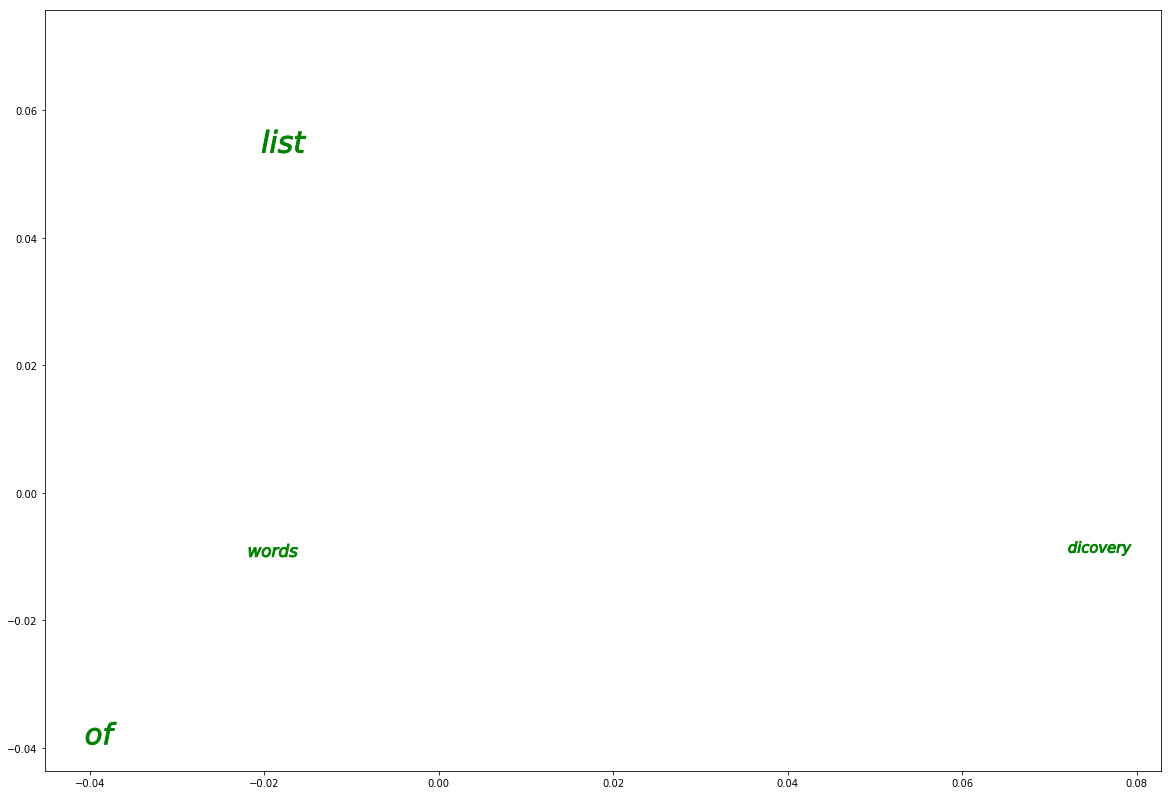

In [8]:
# Project embeddings on plane using the PCA
projection_2d = sklearn.decomposition.PCA(n_components=2).fit_transform(word_embeddings)

# Draw words on plane
f = plt.figure(figsize=(20, 14))

for j in range(len(projection_2d)):
    plt.scatter(projection_2d[j, 0], projection_2d[j, 1],
                marker=('$' + words[j] + '$'),
                s=500 * len(words[j]), label=j,
                facecolors='green')

plt.show()

**Comentarios:** En este taller se utiliza la representación vectorial de las palabras, para encontrar similitud entre ellas, además dado un conjunto de palabras con errores de ortografía, se puede encontrar la palabra más cercana a todas y esta podrá ser considerada palabra correcta.